In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
df.shape

(3168, 21)

In [4]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [5]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

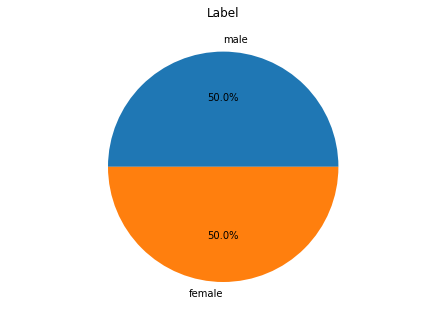

In [6]:
from cProfile import label
import matplotlib.pyplot as plt1
fig = plt1.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
a=df.groupby('label').label.count()
b=df.label.unique()
ax.pie(a,labels=b,autopct='%1.1f%%')
ax.set_title("Label")
plt1.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
lb = LabelEncoder()

In [9]:
df['label'] = lb.fit_transform(df['label'])

In [10]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label         int32
dtype: object

In [11]:
df.duplicated().sum()

2

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
x = df.drop('label',axis=1)
y = df['label']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(3166, 20)
(3166,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=32)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2532, 20)
(634, 20)
(2532,)
(634,)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [16]:
def mscore(model):
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))

def gen_matrix(y_test,y_pred):
    cm  = confusion_matrix(y_test,y_pred)
    print(cm)
    print(classification_report(y_test,y_pred,zero_division=0))
    print('Accuracy Score',accuracy_score(y_test,y_pred))
    

**1)DECISION TREE CLASSIFIER**

In [37]:
#1) Decision Tree Classifier
m1 = DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_split=40)
m1.fit(x_train,y_train)
mscore(m1)
ypred_m1 = m1.predict(x_test)
gen_matrix(y_test,ypred_m1)

Training Score 0.9798578199052133
Testing Score 0.9747634069400631
[[312   9]
 [  7 306]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       321
           1       0.97      0.98      0.97       313

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

Accuracy Score 0.9747634069400631


**2)RANDOM FOREST CLASSIFIER**

In [33]:
#2)Random Forest Classifier
m2 = RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=14,min_samples_split=35)
m2.fit(x_train,y_train)
mscore(m2)
ypred_m2 = m2.predict(x_test)
gen_matrix(y_test,ypred_m2)

Training Score 0.9861769352290679
Testing Score 0.9842271293375394
[[315   6]
 [  4 309]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       321
           1       0.98      0.99      0.98       313

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

Accuracy Score 0.9842271293375394


**3)KNN CLASSIFIER**

In [35]:
#3)KNN Classifier
m3 = KNeighborsClassifier(n_neighbors=10)
m3.fit(x_train,y_train)
mscore(m3)
ypred_m3 = m3.predict(x_test)
gen_matrix(y_test,ypred_m3)


Training Score 0.7717219589257504
Testing Score 0.7003154574132492
[[226  95]
 [ 95 218]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       321
           1       0.70      0.70      0.70       313

    accuracy                           0.70       634
   macro avg       0.70      0.70      0.70       634
weighted avg       0.70      0.70      0.70       634

Accuracy Score 0.7003154574132492


**4)LOGISTIC REGRESSION**

In [36]:
#4)Logistic Regression
m4 = LogisticRegression(max_iter=1500,solver='liblinear')
m4.fit(x_train,y_train)
m4.fit(x_train,y_train)
mscore(m4)
ypred_m4 = m4.predict(x_test)
gen_matrix(y_test,ypred_m4)


Training Score 0.910347551342812
Testing Score 0.916403785488959
[[276  45]
 [  8 305]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       321
           1       0.87      0.97      0.92       313

    accuracy                           0.92       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634

Accuracy Score 0.916403785488959


**5)SVM CLASSIFIER**

In [34]:
#5)SVM Classifier
m5 = SVC(kernel='linear',C=20)
m5.fit(x_train,y_train)
m5.fit(x_train,y_train)
mscore(m5)
ypred_m5 = m5.predict(x_test)
gen_matrix(y_test,ypred_m5)

Training Score 0.9707740916271722
Testing Score 0.9826498422712934
[[312   9]
 [  2 311]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       321
           1       0.97      0.99      0.98       313

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

Accuracy Score 0.9826498422712934


The Model with best Accuracy is **Random Forest Classifier**